<a href="https://colab.research.google.com/github/pmecwan/MAT-421/blob/main/Module_G_Section_21_1%2C_21_2%2C_21_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Numerical Integration Problem Statement



We aim to estimate the integral of a function \( f(x) \) over the interval \([a, b]\). To do this, we assume the interval has been divided into a grid of \( n+1 \) points with uniform spacing \( h \). The grid points are labeled as \( x_i \), starting at \( x_0 = a \) and ending at \( x_n = b \).

Each subinterval is represented as \([x_i, x_{i+1}]\). The function \( f(x) \) is evaluated at each grid point, and these values are used to approximate the integral over the interval \([a, b]\).

Our starting function
Simple numerically integrated function
Error = 0.34


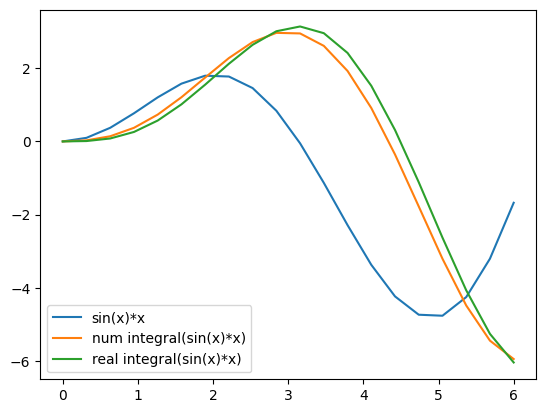

In [21]:
import numpy as np
import matplotlib.pyplot as plt

dx=.3
x=np.linspace(0,6, int(6/dx))

f=np.sin(x)*x

print('Our starting function')
plt.plot(x,f, label='sin(x)*x')

sum=0
F=np.zeros_like(f)
for i in range(len(f)):
  sum+=f[i]*dx
  F[i]=sum

print('Simple numerically integrated function')
plt.plot(x,F, label='num integral(sin(x)*x)')

realAnswer =  np.sin(x)-x*np.cos(x)
plt.plot(x,realAnswer, label='real integral(sin(x)*x)')
plt.legend()

print('Error = %.2f' % np.mean( (F-realAnswer)**2)**.5)

Riemann’s Integral



The Riemann sum is a fundamental method for approximating integrals by summing the areas of rectangles formed over subintervals. Reducing the width of the rectangles improves accuracy. The Midpoint Rule refines this approach by setting the rectangle height at the midpoint. The Riemann sum approximates an integral by summing the areas of rectangles under a curve, where each rectangle has a width and a height, taken from the left, right, or midpoint of the subinterval.

In [22]:
import numpy as np
import matplotlib.pyplot as plt

a = 0
b = np.pi
n = 10
h = (b - a)/(n - 1)
x = np.linspace(a,b,n)
f = np.cos(x)

I_rl = h * np.sum(f[:n-1])
err_rl = 0 - I_rl

I_rr = h * np.sum(f[1:])
err_rr = 0 - I_rr

I_mid = h * np.sum(np.cos((x[:n-1] + x[1:]) / 2 ))
err_mid = 0 - I_mid

print(I_rl)
print(err_rl)

print(I_rr)
print(err_rr)

print(I_mid)
print(err_mid)

0.34906585039886623
-0.34906585039886623
-0.34906585039886573
0.34906585039886573
1.9377047211159066e-16
-1.9377047211159066e-16


Trapezoid Rule

The trapezoidal rule improves upon the Riemann sum by approximating the integral using trapezoids instead of rectangles, making it more accurate. Each trapezoid spans a subinterval over an area.

Our starting function
Trapezoidal numerically integrated function
Error = 0.15


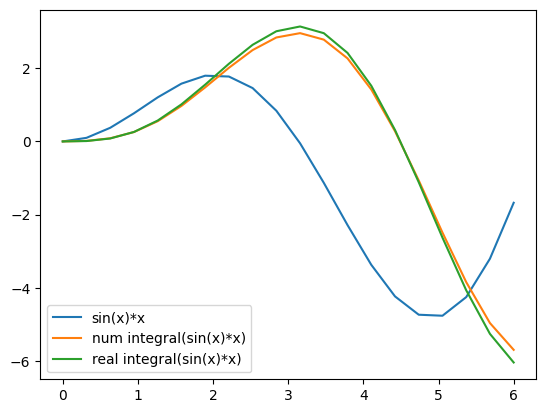

In [23]:
dx=.3
x=np.linspace(0,6, int(6/dx))

f=np.sin(x)*x

print('Our starting function')
plt.plot(x,f, label='sin(x)*x')

sum=0
F=np.zeros(len(f))
for i in range(len(f)-1):
  sum+=(f[i]+f[1+i])/2*dx
  F[i+1]=sum

print('Trapezoidal numerically integrated function')
plt.plot(x,F, label='num integral(sin(x)*x)')

realAnswer =  np.sin(x)-x*np.cos(x)
plt.plot(x,realAnswer, label='real integral(sin(x)*x)')
plt.legend()

print('Error = %.2f' % np.mean( (F[1:]-realAnswer[1:])**2)**.5)

Trapezoid rule approximation integral over subinterval: O(h^3) for single subinterval, O(h^2) for whole integral.

In [24]:
import numpy as np

a = 0
b = np.pi
n = 11
h = (b - a)/(n - 1)
x = np.linspace(a,b,n)
f = np.cos(x)

I_trap = (h/2)*(f[0] + 2*np.sum(f[1:n-1]) + f[n-1])
err_trap = 0 - I_trap

print(I_trap)
print(err_trap)

2.441507948606042e-16
-2.441507948606042e-16
